In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
learning_rate = 0.01
num_steps = 30000
batch_size = 256

display_step = 1000
examples_to_show = 10

num_hidden_1 = 256
num_hidden_2 = 128
num_input = 784

X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}

In [6]:
def encoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']), 
                                  biases['encoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                  biases['encoder_b2']))
    return layer_2

def decoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                  biases['decoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                  biases['decoder_b2']))
    return layer_2

encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

y_pred = decoder_op

y_true = X

loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

init = tf.global_variables_initializer()

In [8]:
sess = tf.Session()
sess.run(init)

for i in range(1, num_steps+1):
    
    batch_x, _ = mnist.train.next_batch(batch_size)
    
    _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
    
    if i % display_step == 0 or i == 1:
        print('Step %i: Minibatch Loss: %f' % (i, l))

Step 1: Minibatch Loss: 0.433403
Step 1000: Minibatch Loss: 0.135452
Step 2000: Minibatch Loss: 0.121854
Step 3000: Minibatch Loss: 0.117276
Step 4000: Minibatch Loss: 0.107553
Step 5000: Minibatch Loss: 0.105190
Step 6000: Minibatch Loss: 0.098307
Step 7000: Minibatch Loss: 0.091902
Step 8000: Minibatch Loss: 0.089093
Step 9000: Minibatch Loss: 0.083811
Step 10000: Minibatch Loss: 0.082776
Step 11000: Minibatch Loss: 0.078988
Step 12000: Minibatch Loss: 0.078977
Step 13000: Minibatch Loss: 0.077323
Step 14000: Minibatch Loss: 0.077202
Step 15000: Minibatch Loss: 0.074917
Step 16000: Minibatch Loss: 0.071988
Step 17000: Minibatch Loss: 0.071324
Step 18000: Minibatch Loss: 0.068409
Step 19000: Minibatch Loss: 0.068865
Step 20000: Minibatch Loss: 0.068465
Step 21000: Minibatch Loss: 0.067325
Step 22000: Minibatch Loss: 0.068954
Step 23000: Minibatch Loss: 0.067590
Step 24000: Minibatch Loss: 0.066351
Step 25000: Minibatch Loss: 0.065521
Step 26000: Minibatch Loss: 0.065004
Step 27000: Mi

Original Images


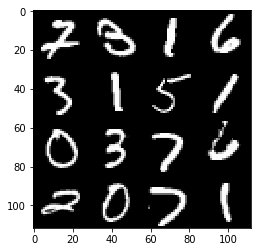

Reconstructed Images


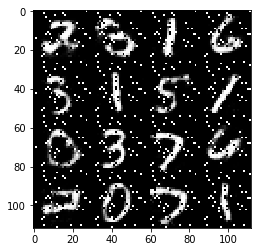

In [9]:
n = 4
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))
for i in range(n):
    batch_x, _ = mnist.test.next_batch(n)
    g= sess.run(decoder_op, feed_dict={X: batch_x})
    
    for j in range(n):
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j+ 1) * 28] = batch_x[j].reshape([28,28])
    
    for j in range(n):
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j +1) * 28] = g[j].reshape([28,28])

print("Original Images")
plt.figure(figsize=(n,n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()